<img src='./img/intel-logo.png' width=50%>

# 인텔코리아 객체인식 강의자료 3강
<font size=5><b>(Training Mobile Single Shot Dectector)<b></font>

<div align='right'> 이 인 구 (Ike Lee) </div>
<div align='right'> 성 민 석 (Minsuk Sung) </div>
<div align='right'> 류 회 성 (Hoesung Ryu) </div>

<h1>Lecture Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-Single-Shot-Dector-(Mobile-SSD)" data-toc-modified-id="Mobile-Single-Shot-Dector-(Mobile-SSD)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mobile Single Shot Dector (Mobile SSD)</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Download-Pretrained-model" data-toc-modified-id="Download-Pretrained-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download Pretrained model</a></span></li><li><span><a href="#Training-Mobile-SSD-model" data-toc-modified-id="Training-Mobile-SSD-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training Mobile SSD model</a></span><ul class="toc-item"><li><span><a href="#Editing-config-file" data-toc-modified-id="Editing-config-file-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Editing config file</a></span></li><li><span><a href="#Training-our-models" data-toc-modified-id="Training-our-models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training our models</a></span></li><li><span><a href="#Export-inference-graph-&amp;-Generate-pb-file" data-toc-modified-id="Export-inference-graph-&amp;-Generate-pb-file-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Export inference graph &amp; Generate pb file</a></span></li></ul></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

---

## Mobile Single Shot Dector (Mobile SSD)

![](https://miro.medium.com/max/2870/1*up-gIJ9rPkHXUGRoqWuULQ.jpeg)

 본 튜토리얼은 `Tensorflow Object Detection API`를 사용해 사용자가 원하는 특정 객체를 빠르게 검출할 수 있는 `Mobile SSD` 모델을 학습해보도록 합니다. 이번 튜토리얼도 앞선 튜토리얼처럼 모델을 학습시켜야 하는 모든 과정이 포함되어 있기 때문에 많은 시간이 소요됩니다.

![](https://miro.medium.com/max/2460/1*0ogh_9xVCQ2AMbW6ehC9YQ.png)

앞에서 Faster R-CNN을 가져와서 원하는 클래스를 학습시켰습니다. 하지만 이런 Faster R-CNN의 단점은 Object Detection 모델 중에서도 2 Stage 모델이기 때문에 생각보다 무겁다는 점인데요. 그래서 이번 시간에는 가볍지만 성능도 좋은 `Mobile SSD` 모델로 학습하는 시간을 가져보도록 하겠습니다.

---

## Data

![](https://miro.medium.com/max/680/1*P-bMHm-VdNqUl2d_zrSeVA.jpeg)

앞선 강의에서 이미 XML파일을 CSV파일로 만들고 다시 CSV파일을 TFRecord파일로 만드는 작업을 진행했기 때문에, 이번 튜토리얼에서는 이 부분을 생략하도록 하겠습니다. `data`폴더에 `train.record`와 `test.record`파일이 존재하지 않는다면, 이전 튜토리얼로 돌아가셔서 데이터를 생성해주시고 아래 남은 부분을 실습해보시길 바랍니다.

---

## Download Pretrained model

![](./img/tensorflow_github.png)

Tensorflow에서 제공하는 Object Detection Model은 모두 [Google GitHub](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)을 통해서 이용가능합니다. 이번 시간에는 1강에서 사용했던 모델을 그대로 활용할 것이기 때문에 별도의 다운로드는 진행하지 않겠습니다. 하지만 어떤 이유로 인하여 모델 관련 파일이 손상됐거나 손실됐을 경우 아래와 같은 방법으로 다시 다운로드해주시길 바랍니다.

In [34]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'    

```python
get_pretrained_model(MODEL_NAME) # 모델 다운로드
```

```sh
! cd pretrained_model && ls

! file ./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28.tar.gz

! cd ./pretrained_model && tar -xvf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

! cd ./pretrained_model && rm ssd_mobilenet_v1_coco_2018_01_28.tar.gz && cd ssd_mobilenet_v1_coco_2018_01_28 && ls
```

In [35]:
from utils.func import *
get_pretrained_model(MODEL_NAME)

/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  


[SUCCESS] Download Complete...


In [36]:
! cd pretrained_model && ls

coco_class.txt			      ssd_mobilenet_v1_coco_2018_01_28.tar.gz
faster_rcnn_resnet50_coco_2018_01_28


In [37]:
! file ./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28.tar.gz

./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28.tar.gz: gzip compressed data, last modified: Thu Feb  8 02:03:03 2018, from Unix


In [38]:
! cd ./pretrained_model && tar -xvf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

ssd_mobilenet_v1_coco_2018_01_28/
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.index
ssd_mobilenet_v1_coco_2018_01_28/checkpoint
ssd_mobilenet_v1_coco_2018_01_28/pipeline.config
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.meta
ssd_mobilenet_v1_coco_2018_01_28/saved_model/
ssd_mobilenet_v1_coco_2018_01_28/saved_model/saved_model.pb
ssd_mobilenet_v1_coco_2018_01_28/saved_model/variables/
ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb


In [39]:
! cd ./pretrained_model && rm ssd_mobilenet_v1_coco_2018_01_28.tar.gz && cd ssd_mobilenet_v1_coco_2018_01_28 && ls

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


그리고 여기에서 우리가 사용할 부분은 `config`파일입니다. 이 파일을 각 모델로 복사하여 가져옵시다.

In [72]:
!cp pretrained_model/ssd_mobilenet_v1_coco_2018_01_28/pipeline.config models/

---

## Training Mobile SSD model

<img src='https://i0.wp.com/blogs.cfainstitute.org/investor/files/2018/01/Artificial-Intelligence-Machine-Learning-and-Deep-Learning-A-Primer.png?resize=940%2C575&ssl=1' width=50%>

 Tensorflow API를 통해서 Object Detection 모델을 학습하는 과정은 요약하자면 위에서 만들어진 `record`, `config`와 `pbtxt` 세가지 파일을 가지고` ckpt`파일을 만들고 원하는 ckpt파일에서 추출하여 `pb`파일을 얻는 과정입니다. 학습을 진행하기에 앞서, `config`파일을 수정해야합니다. 그 이유는 복사해온 config파일은 기존의 Pretrained model의 label을 학습하기 위한 파일이기 때문에 우리의 입맛에 맞게 수정해줘야합니다. config파일에는 전체적인 모델의 요약된 정보부터 어떤 tfrecord로 학습하여 ckpt를 어디에 저장할지까지 수많은 정보가 있습니다. 이러한 config파일을 통하여 ckpt가 생성이 되면 추론에 사용할 수 있는 가중치 파일인 `pb`파일을 생성할 수 있습니다.

### Editing config file

models 폴더로 이동하여 위에서 복사한 pipeline.config를 찾습니다.


기존 파일에서는 `num_classes`의 값이 90으로 되어있는데, 이 값을 37로 변경해줍니다.
> num_classes = 37

또한 아래에서 `PATH_TO_BE_CONFIGURED`로 되어 있는 부분들을 변경해줍니다. 이 값들은 총 5개가 있는데 경로에 알맞게 변경해주어야 합니다. 
일단 가장 처음으로 ckpt파일의 위치를 지정해주어야 합니다.

> fine_tune_checkpoint: "`pretrained_model/ssd_mobilenet_v1_coco_2018_01_28`/model.ckpt"

다음으로 train에서의 값들을 변경해주어야 합니다.
> label_map_path: "`models`/`label_map`/pet_label_map.pbtxt"  
> input_path: "`data`/`train`.record"

마지막으로 test에서의 값들을 변경해주어야 합니다.
> label_map_path: "`models`/`label_map`/pet_label_map.pbtxt"  
> input_path: "`data`/`test`.record"

> 최종 config파일은 models 폴더 안에 pipeline_pet_ssd.config 이름으로 저장합니다.

### Training our models

 여기까지 학습을 위한 준비과정은 끝났습니다. 지금부터는 본격적으로 학습을 진행보도록 하겠습니다. 학습이 진행됨에 따라서 나오는 ckpt 파일은 각 모델의 checkpoint 폴더에 저장 됩니다. 만약 NUC에서 진행할 경우, 상당히 오랜 시간이 소요되므로, 불가피한 경우가 아니라면 GPU가 있는 서버와 같은 환경에서 진행하시길 바랍니다.
 
```
NUM_TRAIN_STEPS= 학습시킬 횟수
NUM_EVAL_STEPS= 검증시킬 횟수 

```

학습시 기존 checkpoint 폴더를 삭제하고 진행하시길 바랍니다.

In [ ]:
%%time
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim:`pwd`/object_detection && \
PIPELINE_CONFIG_PATH=models/pipeline_pet_ssd.config && \
MODEL_DIR=models/checkpoint && \
NUM_TRAIN_STEPS=90000 && \
NUM_EVAL_STEPS=2000 && \
python3 object_detection/model_main.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --num_train_steps=${NUM_TRAIN_STEPS} \
    --num_eval_steps=${NUM_EVAL_STEPS} \
    --alsologtostderr

/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/intel-object-detect

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W1130 15:36:10.098307 140356124232576 deprecation.py:323] From /home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.

W1130 15:36:10.111015 140356124232576 deprecation_wrapper.py:119] From /home/intel/intel-object-detection/object_detection/data_decoders/tf_example_decoder.py:182: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.


W1130 15:36:10.111259 140356124232576 deprecation_wrapper.py:119] From /home/intel/intel-object-detection/object_detection/data_decoders/tf_examp

INFO:tensorflow:Calling model_fn.
I1130 15:36:11.323564 140356124232576 estimator.py:1145] Calling model_fn.
W1130 15:36:11.614370 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f567c128>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f567c128>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:11.725592 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f567c710>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 

W1130 15:36:11.983915 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f561da20>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f561da20>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:12.039109 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f55b26d8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:36:12.291071 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f568be48>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f568be48>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:12.325696 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f5cc4e10>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

W1130 15:36:12.610840 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72f6055c0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72f6055c0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:12.631426 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6f5a442b0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:36:12.893486 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa72f47afd0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa72f47afd0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:12.952143 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72f6dceb8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:36:13.335082 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f566af98>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f566af98>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:13.358751 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa72fb97d30>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:36:13.643941 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72fb97cf8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72fb97cf8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:13.669982 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa72f9924a8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

INFO:tensorflow:depth of additional conv before box predictor: 0
I1130 15:36:14.312681 140356124232576 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1130 15:36:14.358899 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f54b12e8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f54b12e8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:36:14.412576 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa72fa93a90>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

W1130 15:36:14.811572 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f54b1668>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f54b1668>>: AssertionError: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:depth of additional conv before box predictor: 0
I1130 15:36:14.814169 140356124232576 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1130 15:36:14.864556 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6f53968d0>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1130 15:36:20.145676 140356124232576 deprecation.py:506] From /home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
I1130 15:36:23.381014 140356124232576 estimator.py:1147] Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
I1130 15:36:23.382156 140356124232576 basic_session_run_hooks.py:541] Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
I1130 15:36:25.808913 140356124232576 monitored_session.py:240] Graph was finalized.
2020-11-30 15:36:25.809158: I tensorflow/core/platform/cpu_feature_guard.cc:142] 

W1130 15:46:44.581918 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6a81d6d30>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa6a81d6d30>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:44.629900 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6a81de278>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:46:44.909749 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b7245f8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b7245f8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:44.959400 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa69b7da2e8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:46:45.217861 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b451a58>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b451a58>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:45.270130 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa69b53ff98>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:46:45.514461 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b1cce48>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b1cce48>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:45.543529 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69b26fa58>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

W1130 15:46:45.820948 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69af94518>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69af94518>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:45.868576 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6a826a9b0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:46:46.105597 140356124232576 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69adf10b8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa69adf10b8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:46.153946 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa69aed1d30>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

INFO:tensorflow:depth of additional conv before box predictor: 0
I1130 15:46:47.075175 140356124232576 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1130 15:46:47.126463 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c03477f0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c03477f0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:46:47.176920 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c03474e0>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

W1130 15:46:47.527258 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c0347128>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c0347128>>: AssertionError: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:depth of additional conv before box predictor: 0
I1130 15:46:47.529748 140356124232576 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1130 15:46:47.577065 140356124232576 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa6c0347128>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap


W1130 15:46:49.483705 140356124232576 deprecation_wrapper.py:119] From /home/intel/intel-object-detection/object_detection/model_lib.py:484: The name tf.metrics.mean is deprecated. Please use tf.compat.v1.metrics.mean instead.

INFO:tensorflow:Done calling model_fn.
I1130 15:46:49.640475 140356124232576 estimator.py:1147] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T15:46:49Z
I1130 15:46:49.655189 140356124232576 evaluation.py:255] Starting evaluation at 2020-11-30T15:46:49Z
INFO:tensorflow:Graph was finalized.
I1130 15:46:49.860059 140356124232576 monitored_session.py:240] Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W1130 15:46:49.860498 140356124232576 deprecation.py:323] From /home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed i

### Export inference graph & Generate pb file
충분히 학습을 시켰다고 생각되면, 이제 학습을 중단시키고 학습된 모델을 export해야 합니다. Export된 모델은 이 예제에 그대로 적용할 수 있습니다. 아래와 같이, Checkpoint가 생성된 것을 확인할 수 있습니다. 이 Checkpoint를 frozen graph로 export 하는 것입니다. training 디렉토리(models/checkpoint)에서 ls를 해 보면, 아래와 같이 여러개의 checkpoint 파일 (model.ckpt-XXXX.* 파일)이 보입니다. 이 중에서 XXXX의 숫자가 가장 큰 것이 마지막으로 생성된 checkpoint 파일입니다.

> export_inference_graph.py를 실행시킬 때, `--trained_checkpoint_prefix` 파라미터에 숫자를 틀리지 않게 지정해야 합니다. 각자 생성된 checkpoint에 따라 알맞는 숫자를 사용하세요.

In [63]:
%%time
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim:`pwd`/object_detection && \
PIPELINE_CONFIG_PATH=models/pipeline_pet_ssd.config && \
TRAINED_CKPT_PREFIX=models/checkpoint/model.ckpt-93084 && \
OUTPUT_DIR=models/freeze && \
python3 object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path ${PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_prefix ${TRAINED_CKPT_PREFIX} \
    --output_directory ${OUTPUT_DIR}

/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/intel-object-detect

W1130 15:26:10.146630 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573f52f60>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573f52f60>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:10.195670 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573f52cc0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1130 15:26:10.427043 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573f42c18>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573f42c18>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:10.461943 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573d4b780>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

W1130 15:26:10.732934 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573c3a278>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573c3a278>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:10.758016 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573f52908>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:26:11.123977 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573a48cf8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573a48cf8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:11.149549 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb573d4bc88>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:26:11.494828 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb5738d7e80>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb5738d7e80>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:11.520187 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb5737e8128>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:26:11.832771 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573724da0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573724da0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:11.857692 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb57399ed30>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:26:12.128842 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573fac2e8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb573fac2e8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:12.151222 140418382056320 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fb57352b6a0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1130 15:26:12.951174 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572e869b0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572e869b0>>: AssertionError: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:depth of additional conv before box predictor: 0
I1130 15:26:12.958169 140418382056320 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1130 15:26:13.010907 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572eb5cf8>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

W1130 15:26:13.391579 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572d04898>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572d04898>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1130 15:26:13.453042 140418382056320 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fb572d6c0b8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python

224 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz


W1130 15:26:16.014077 140418382056320 deprecation_wrapper.py:119] From /home/intel/intel-object-detection/object_detection/exporter.py:432: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

2020-11-30 15:26:16.888528: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-11-30 15:26:16.910191: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3499910000 Hz
2020-11-30 15:26:16.910431: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5f8c080 executing computations on platform Host. Devices:
2020-11-30 15:26:16.910464: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W1130 15:26:16.910868 140418382056320 deprecation.py:323] From /home/intel/intel-object-detection/venv/lib/python3.6

CPU times: user 169 ms, sys: 62.4 ms, total: 231 ms
Wall time: 12.3 s


---

## 모델 평가하기 

![](https://pngimage.net/wp-content/uploads/2018/06/test-png-5.png)

In [64]:
import os
import sys
import glob
import platform
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.func import *
from utils.detector import ObjectDetector

In [65]:
print('OS System : {}'.format(platform.system()))
print('Tensorflow Version : {}'.format(tf.__version__))
assert tf.__version__ == '1.14.0'

OS System : Linux
Tensorflow Version : 1.14.0


In [66]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'models/label_map/pet_label_map.pbtxt'

In [67]:
PATH_TO_CKPT = 'models/freeze/frozen_inference_graph.pb'

In [68]:
NUM_CLASSES = 37
label_map, categories, category_index = get_label_category_index(PATH_TO_LABELS, NUM_CLASSES)
print(category_index)

{1: {'id': 1, 'name': 'Abyssinian'}, 2: {'id': 2, 'name': 'american_bulldog'}, 3: {'id': 3, 'name': 'american_pit_bull_terrier'}, 4: {'id': 4, 'name': 'basset_hound'}, 5: {'id': 5, 'name': 'beagle'}, 6: {'id': 6, 'name': 'Bengal'}, 7: {'id': 7, 'name': 'Birman'}, 8: {'id': 8, 'name': 'Bombay'}, 9: {'id': 9, 'name': 'boxer'}, 10: {'id': 10, 'name': 'British_Shorthair'}, 11: {'id': 11, 'name': 'chihuahua'}, 12: {'id': 12, 'name': 'Egyptian_Mau'}, 13: {'id': 13, 'name': 'english_cocker_spaniel'}, 14: {'id': 14, 'name': 'english_setter'}, 15: {'id': 15, 'name': 'german_shorthaired'}, 16: {'id': 16, 'name': 'great_pyrenees'}, 17: {'id': 17, 'name': 'havanese'}, 18: {'id': 18, 'name': 'japanese_chin'}, 19: {'id': 19, 'name': 'keeshond'}, 20: {'id': 20, 'name': 'leonberger'}, 21: {'id': 21, 'name': 'Maine_Coon'}, 22: {'id': 22, 'name': 'miniature_pinscher'}, 23: {'id': 23, 'name': 'newfoundland'}, 24: {'id': 24, 'name': 'Persian'}, 25: {'id': 25, 'name': 'pomeranian'}, 26: {'id': 26, 'name': 

In [69]:
# Path to image
print(glob.glob('img/test_pet/*.jpg'))

['img/test_pet/Bengal_60.jpg', 'img/test_pet/Abyssinian_3.jpg', 'img/test_pet/japanese_chin_199.jpg', 'img/test_pet/beagle_197.jpg']


In [70]:
# 추론하기 위한 모델 생성
myMobileSSD = ObjectDetector(PATH_TO_LABELS, PATH_TO_CKPT, NUM_CLASSES)

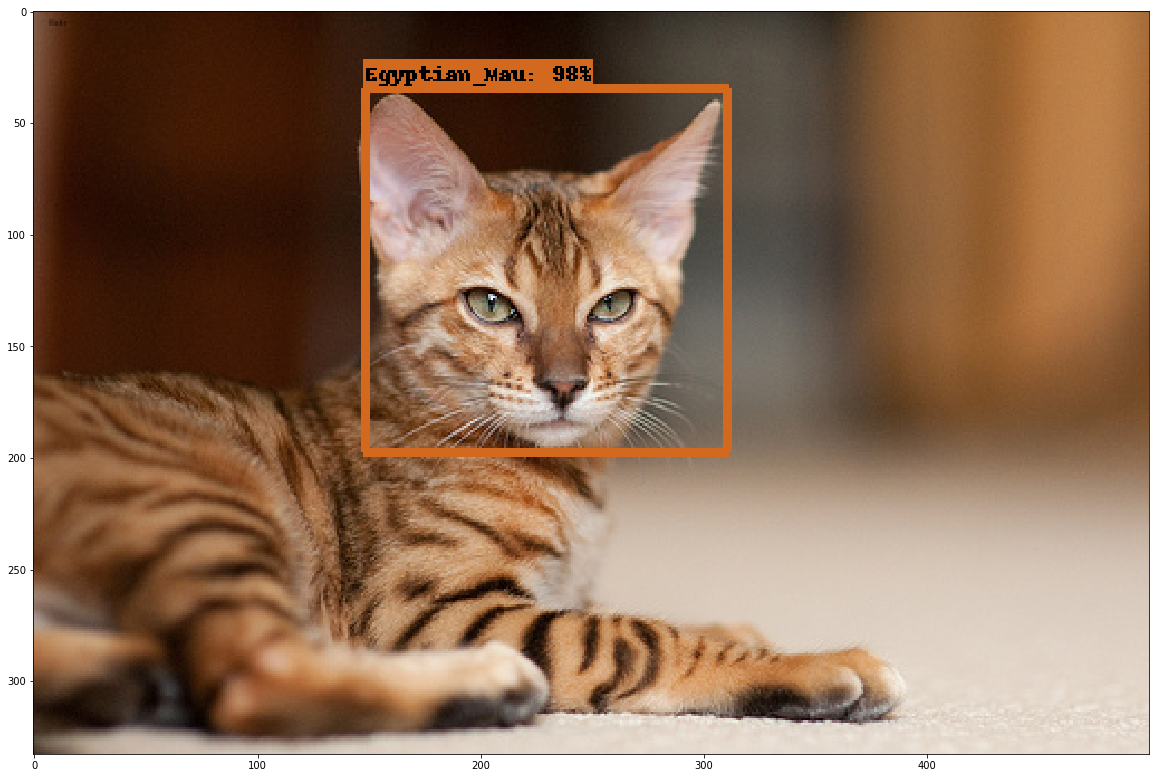

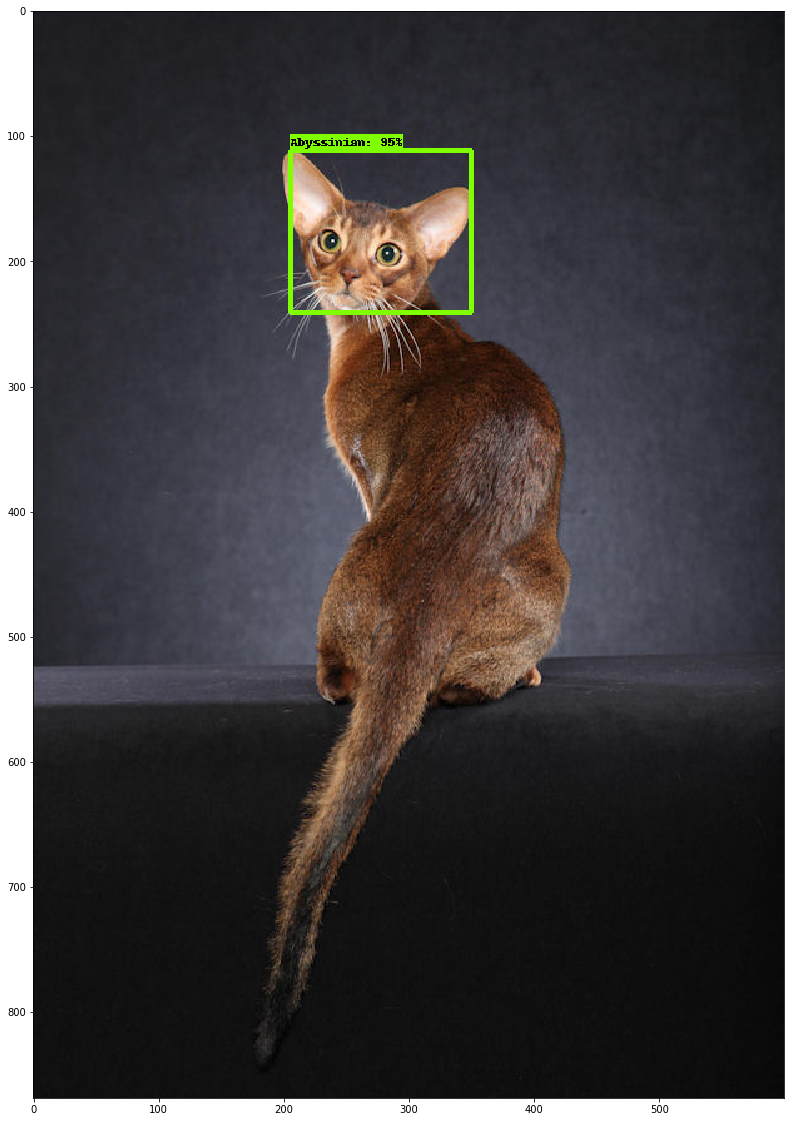

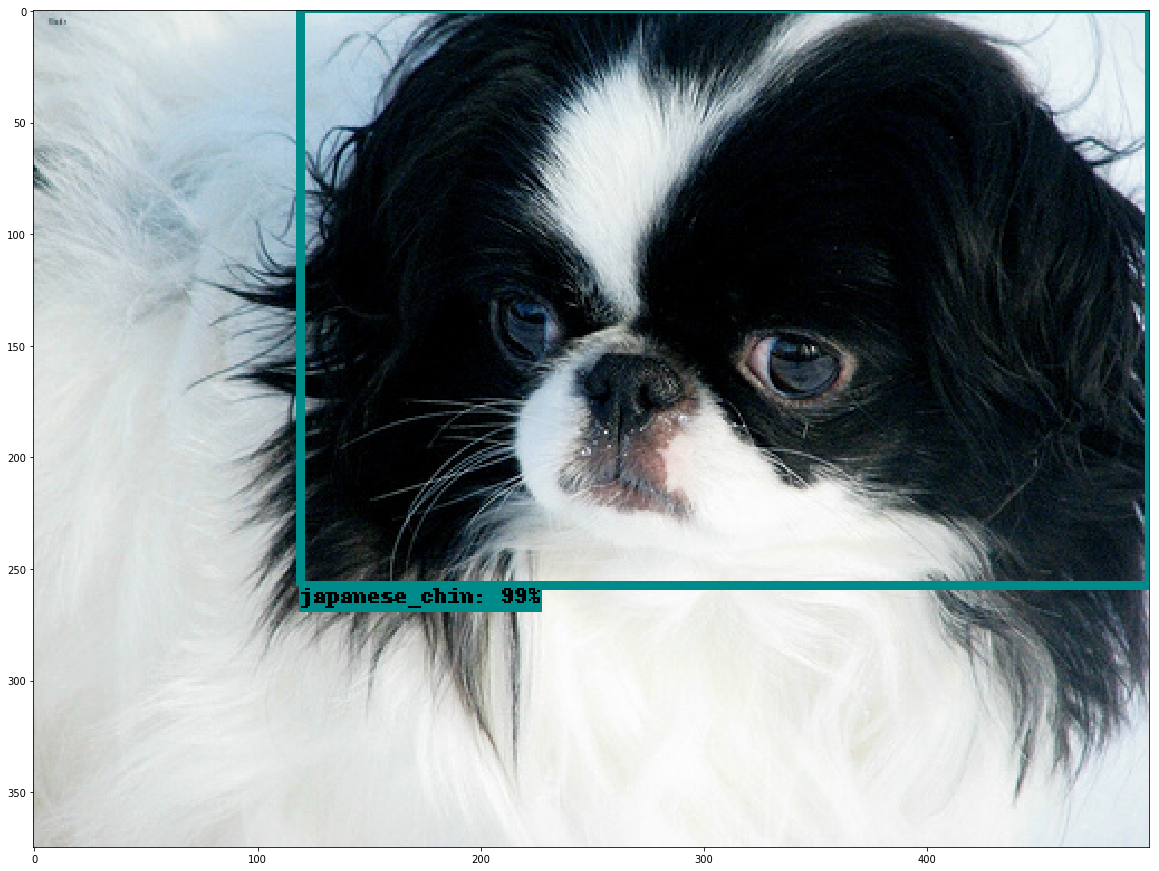

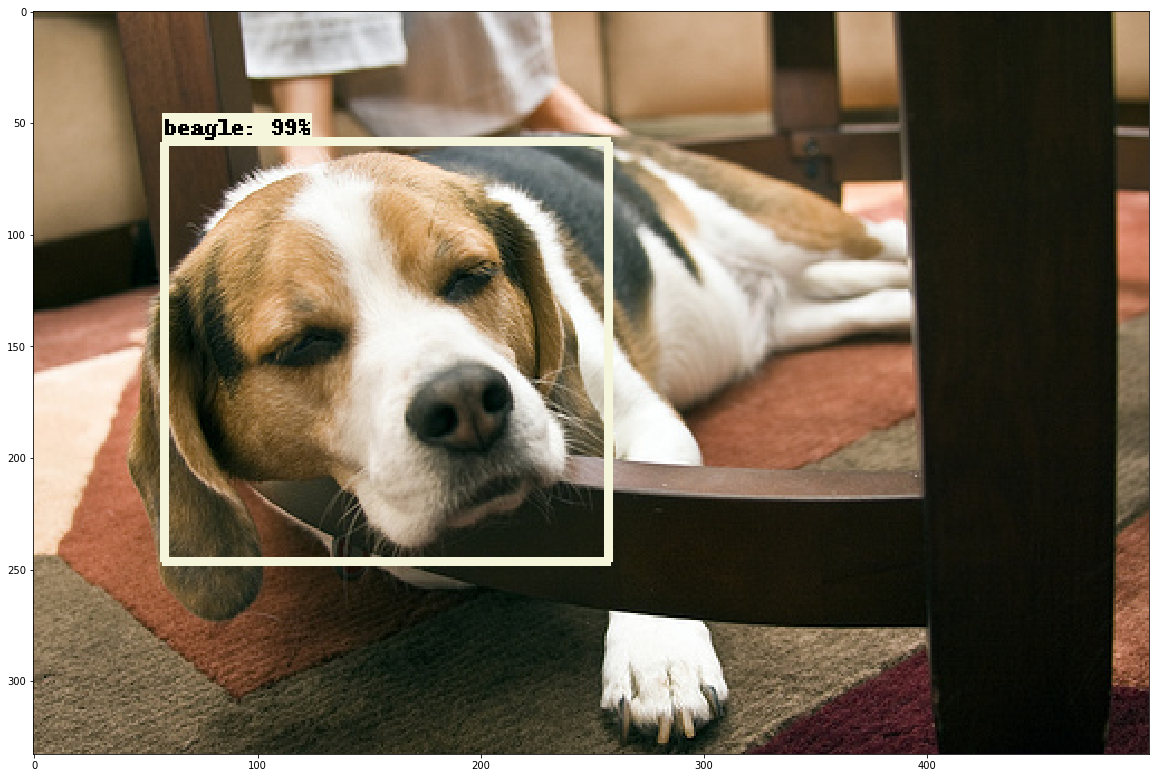

In [71]:
%matplotlib inline
for img_path in glob.glob('img/test_pet/*.jpg'):
    myMobileSSD.get_detected_info(img_path,category_index)

---

## Reference

- https://ukayzm.github.io/pet-training/
- https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06